In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample_stocks.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   returns        648 non-null    int64  
 1   dividendyield  648 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


In [2]:
df.describe()

,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


In [3]:
df.head()

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [4]:
df.count()

returns          648
dividendyield    648
dtype: int64

In [5]:
df.max()

returns          40.0
dividendyield     4.9
dtype: float64

In [6]:
df.min()

returns         -20.0
dividendyield     0.0
dtype: float64

In [7]:
df.isna().sum()

returns          0
dividendyield    0
dtype: int64

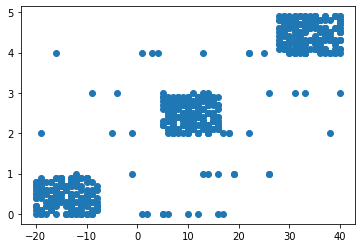

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,0],df.iloc[:,1])

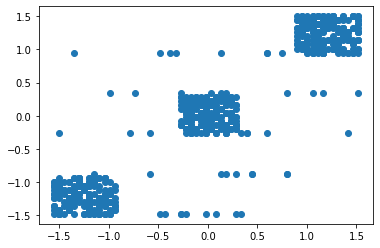

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

plt.scatter(scaled.iloc[:,0],scaled.iloc[:,1])

In [10]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3)
clusters = kmeans.fit(scaled)

clusters.inertia_

77.62109287678899

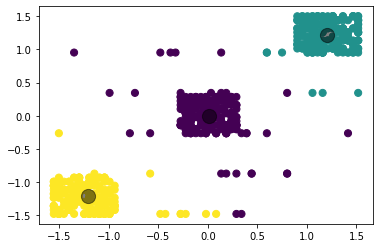

In [11]:
plt.scatter(scaled.iloc[:, 0], scaled.iloc[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

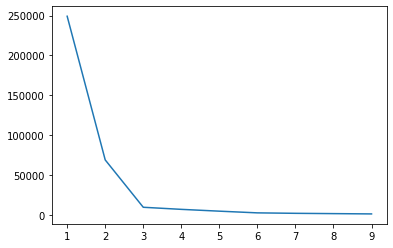

In [12]:
result = []

for i in range(1,10):
    kmeans = cluster.KMeans(n_clusters=i)
    clusters = kmeans.fit(df)

    result.append(clusters.inertia_)

plt.plot(range(1,10),result)

### Como o Grafico Acima faz o cutuvelo após 3 clusters, identificamos que o número ótimo de clusters é 3

In [13]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendogram(model,**kwargs):
    counts=np.zeros(model.children_.shape[0])
    n_samples=len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count+=1
            else:
                current_count+=counts[child_idx-n_samples]
        counts[i]=current_count
    linkage_matrix = np.column_stack([model.children_,model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix,**kwargs)


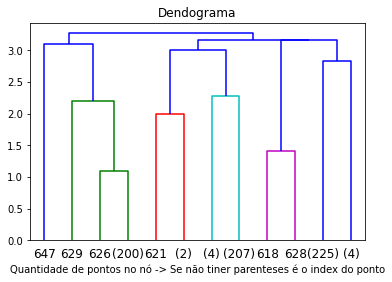

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single')

model = model.fit(df)
plt.title('Dendograma')
plot_dendogram(model,truncate_mode='level',p=3)
plt.xlabel("Quantidade de pontos no nó -> Se não tiner parenteses é o index do ponto")
plt.show()


Text(0.5, 1.0, 'DBSCAN')

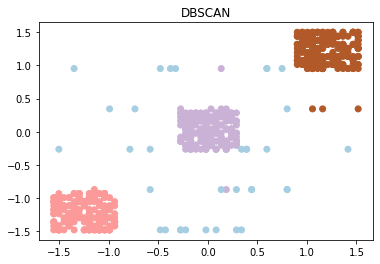

In [15]:
from sklearn.cluster import DBSCAN
ss= StandardScaler()
X = ss.fit_transform(df)
model = DBSCAN(eps=1, min_samples=10).fit(X)

labels = model.labels_
y_pred = model.fit_predict(df)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")